In [342]:
from support.df_init import init

train = init()
test = init('pp_test.csv')

In [343]:
# diff_count = (train['isAdult'] != train['is_Adult']).sum()
# percent_diff = 100 * diff_count / len(train)
# percent_diff, diff_count

In [344]:
# diff_count = (test['isAdult'] != test['is_Adult']).sum()
# percent_diff = 100 * diff_count / len(test)
# percent_diff, diff_count

In [345]:
train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [346]:
# train['is_Adult'] = train['isAdult'] | train['is_Adult']
# test['is_Adult'] = test['isAdult'] | test['is_Adult']

In [347]:
train['is_Adult'].value_counts(), test['is_Adult'].value_counts()

(is_Adult
 0    15706
 1      425
 Name: count, dtype: int64,
 is_Adult
 0    5234
 1     134
 Name: count, dtype: int64)

In [348]:
# train = train.drop(columns=['isAdult'])
# test = test.drop(columns=['isAdult'])

In [349]:
# train.to_csv('pp_train.csv', index=False)
# test.to_csv('pp_test.csv', index=False)

In [350]:
train = init('dm1_dataset_2425_imdb/train.csv')
test = init('dm1_dataset_2425_imdb/test.csv')

In [351]:
import pandas as pd

# One-hot encode the 'genres' column for both train and test DataFrames
train_genres = train['genres'].str.get_dummies(sep=',')
test_genres = test['genres'].str.get_dummies(sep=',')

# Align columns to ensure both train and test have the same genre columns
train_genres, test_genres = train_genres.align(test_genres, join='outer', axis=1, fill_value=0)

# Optionally, concatenate back to the original DataFrames
train = pd.concat([train, train_genres], axis=1)
test = pd.concat([test, test_genres], axis=1)

In [352]:
train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       '\N'],
      dtype='object')

In [353]:
diff_count = (train['isAdult'] != train['Adult']).sum()
percent_diff = 100 * diff_count / len(train)
percent_diff, diff_count

(0.09737690950033473, 16)

In [354]:
diff_count = (test['isAdult'] != test['Adult']).sum()
percent_diff = 100 * diff_count / len(test)
percent_diff, diff_count

(0.018254837531945966, 1)

In [355]:
train['awardWins'] = train['awardWins'].fillna(0)

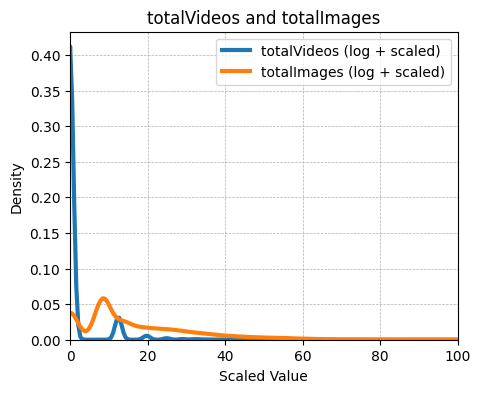

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert totalVideos and totalImages to log scale (add 1 to avoid log(0))
videos_log = np.log1p(train['totalVideos'])
images_log = np.log1p(train['totalImages'])

# Combine and reshape into a 2D array for scaling
log_combined = np.vstack((videos_log, images_log)).T

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log_combined)
scaled_videos = scaled[:, 0] * 100
scaled_images = scaled[:, 1] * 100

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(5, 4))
sns.kdeplot(scaled_videos, label='totalVideos (log + scaled)', color='tab:blue', linewidth=3)
sns.kdeplot(scaled_images, label='totalImages (log + scaled)', color='tab:orange', linewidth=3)
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('totalVideos and totalImages')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 100)
plt.show()

In [357]:
scaled.max(axis=0)

array([1., 1.])

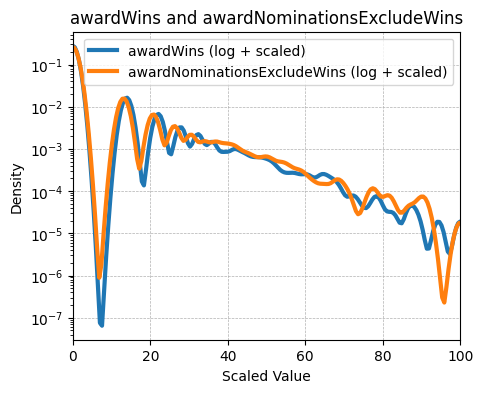

In [358]:
awards = np.log1p(train['awardWins'])
nominations = np.log1p(train['awardNominationsExcludeWins'])

# Combine and reshape into a 2D array for scaling
log_combined = np.vstack((awards, nominations)).T

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log_combined)
scaled_wins = scaled[:, 0] * 100
scaled_nominations = scaled[:, 1] * 100

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(5, 4))
sns.kdeplot(scaled_wins, label='awardWins (log + scaled)', color='tab:blue', linewidth=3)
sns.kdeplot(scaled_nominations,
            label='awardNominationsExcludeWins (log + scaled)', color='tab:orange', linewidth=3)
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('awardWins and awardNominationsExcludeWins')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 100)
plt.yscale('log')
plt.show()

In [359]:
scaled_wins.max()

100.0

In [360]:
from scipy.stats import gaussian_kde
import numpy as np

kde_awards = gaussian_kde(scaled_videos)
kde_nominations = gaussian_kde(scaled_images)

x = np.linspace(0, 1, 1000)
area_awards = np.trapz(kde_awards(x), x)
area_nominations = np.trapz(kde_nominations(x), x)

print(f"AUC for awardWins: {area_awards:.3f}")
print(f"AUC for awardNominations: {area_nominations:.3f}")


AUC for awardWins: 0.337
AUC for awardNominations: 0.037


In [361]:
(train['titleType'] == 'videoGame').sum()

259

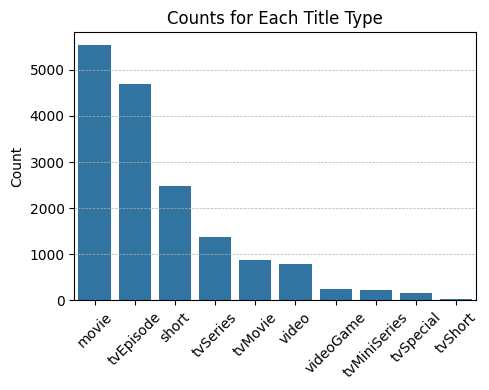

In [362]:
plt.figure(figsize=(5, 4))
sns.countplot(
    data=train, x='titleType', order=train['titleType'].value_counts().index,
    color='tab:blue')
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Counts for Each Title Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.show()

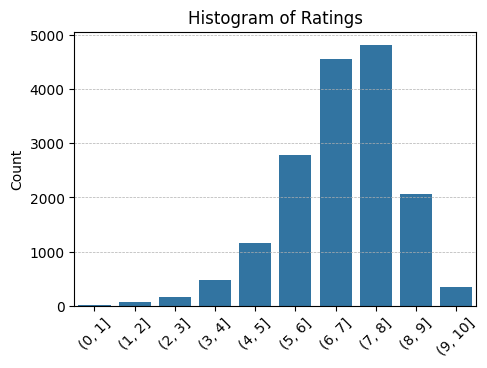

In [364]:
plt.figure(figsize=(5, 3.5))
train.sort_values(by='rating', inplace=True)

sns.countplot(
    data=train, x='rating',
    # order=order,
    color='tab:blue')
plt.xlabel(None)
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [299]:
print(train['titleType'].value_counts())

titleType
movie           5535
tvEpisode       4698
short           2474
tvSeries        1375
tvMovie          868
video            792
videoGame        259
tvMiniSeries     224
tvSpecial        166
tvShort           40
Name: count, dtype: int64


In [300]:
type_percentages = 100 * train['titleType'].value_counts(normalize=True)
print(type_percentages)

titleType
movie           33.686325
tvEpisode       28.592295
short           15.056905
tvSeries         8.368328
tvMovie          5.282697
video            4.820157
videoGame        1.576289
tvMiniSeries     1.363277
tvSpecial        1.010285
tvShort          0.243442
Name: proportion, dtype: float64


In [301]:
init().columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

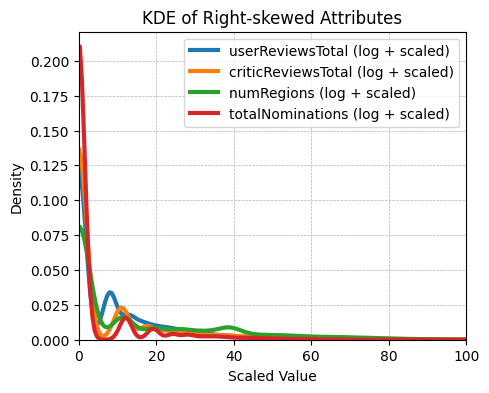

In [302]:
attributes = ['userReviewsTotal', 'criticReviewsTotal', 'numRegions', 'totalNominations',
            #   'totalMedia',
            #   'numVotes', 'totalCredits'
              ]

train ['totalMedia'] = train['totalImages'] + train['totalVideos']
train ['totalNominations'] = train['awardNominationsExcludeWins'] + train['awardWins']

log = np.log1p(train[attributes])

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log)
# scaled_videos = scaled[:, 0]
# scaled_images = scaled[:, 1]

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(5, 4))
for i, attr in enumerate(attributes):
    sns.kdeplot(scaled[:, i] * 100, label=attr + ' (log + scaled)', linewidth=3)
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('KDE of Right-skewed Attributes')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 100)
# plt.yscale('log')
plt.show()

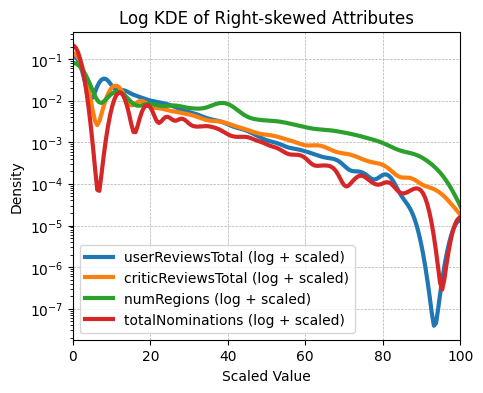

In [303]:
attributes = ['userReviewsTotal', 'criticReviewsTotal', 'numRegions', 'totalNominations',
            #   'totalMedia',
            #   'numVotes', 'totalCredits'
              ]

train ['totalMedia'] = train['totalImages'] + train['totalVideos']
train ['totalNominations'] = train['awardNominationsExcludeWins'] + train['awardWins']

log = np.log1p(train[attributes])

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(log)
# scaled_videos = scaled[:, 0]
# scaled_images = scaled[:, 1]

# Plot KDE (smoothed line plot of distribution)
plt.figure(figsize=(5, 4))
for i, attr in enumerate(attributes):
    sns.kdeplot(scaled[:, i] * 100, label=attr + ' (log + scaled)', linewidth=3)
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.title('Log KDE of Right-skewed Attributes')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0, 100)
plt.yscale('log')
plt.show()

In [304]:
from scipy.stats import gaussian_kde
import numpy as np

# Compute AUC for each attribute in 'attributes' for values below 20 (after scaling)
for i, attr in enumerate(attributes):
    # Get the scaled values for this attribute (scaled to [0, 1], then *100)
    scaled_attr = scaled[:, i] * 100
    # Select values below 20
    below_20 = scaled_attr[scaled_attr < 20]
    if len(below_20) > 1:
        kde = gaussian_kde(below_20)
        x_range = np.linspace(0, 20, 500)
        auc = np.trapz(kde(x_range), x_range)
        print(f"AUC for {attr} (scaled < 20): {auc:.4f}")
    else:
        print(f"Not enough data for {attr} below 20 to compute AUC.")

AUC for userReviewsTotal (scaled < 20): 0.6673
AUC for criticReviewsTotal (scaled < 20): 0.5955
AUC for numRegions (scaled < 20): 0.5918
AUC for totalNominations (scaled < 20): 0.5465


In [305]:
scaled.shape

(16431, 4)

In [306]:
train = init()
test = init('pp_test.csv')

In [307]:
train = train[train['titleType'] != 'tvShort']
test = test[test['titleType'] != 'tvShort']

In [308]:
# train.to_csv('pp_train.csv', index=False)
# test.to_csv('pp_test.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


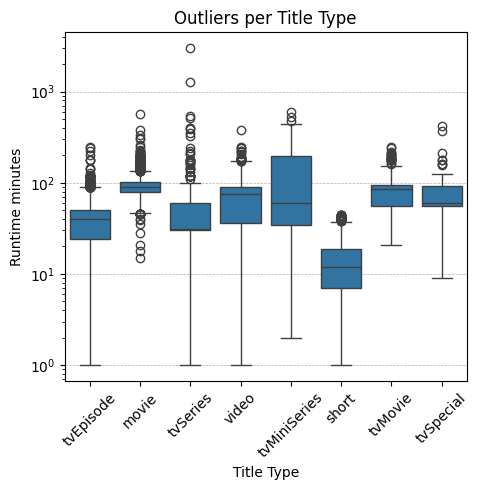

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.boxplot(
    data=train,
    x='titleType',
    y='runtimeMinutes',
    showfliers=True,  # show outliers as points
    whis=1.5         # whiskers at 1.5*IQR
)
plt.xlabel('Title Type')
plt.ylabel('Runtime minutes')
plt.title('Outliers per Title Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.show()

In [310]:
(train['runtimeMinutes'] == 0).sum()

0

In [311]:
train.loc[train['runtimeMinutes'] == 0]

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,fill_runtimeMinutes_Bruno,totalNominations,totalMedia,runtimeMinutes_notitletype,outlier_no_type,outlier_w_type


In [312]:
train = train[train['runtimeMinutes'] != 0]
test = test[test['runtimeMinutes'] != 0]

In [313]:
import numpy as np

conditions = [
    train['is_Short'] & ~train['canHaveEpisodes'],
    ~train['is_Short'] & train['canHaveEpisodes'],
    train['is_Short'] & train['canHaveEpisodes'],
    ~train['is_Short'] & ~train['canHaveEpisodes']
]

choices = [
    'Short',
    'Has episodes',
    'Short, has episodes',
    'Not short, no episodes'
]

train['type'] = np.select(conditions, choices)

In [314]:
train['type']

0        Not short, no episodes
1        Not short, no episodes
2                  Has episodes
3                  Has episodes
4                         Short
                  ...          
16126    Not short, no episodes
16127    Not short, no episodes
16128    Not short, no episodes
16129    Not short, no episodes
16130                     Short
Name: type, Length: 16131, dtype: object

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


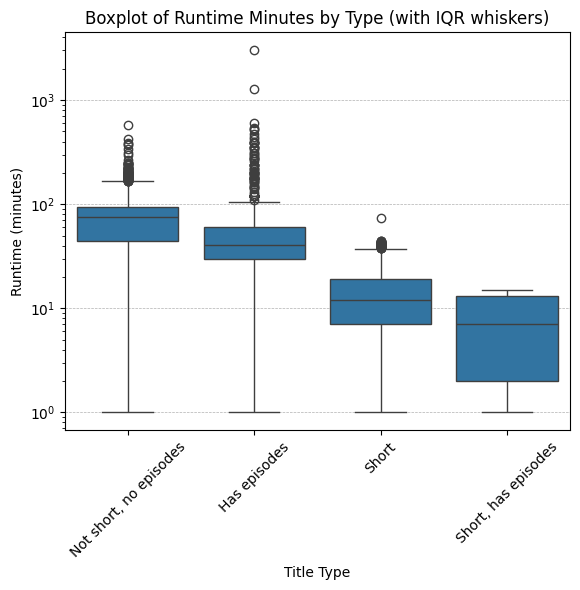

In [315]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=train,
    x='type',
    y='runtimeMinutes',
    showfliers=True,  # show outliers as points
    whis=1.5         # whiskers at 1.5*IQR
)
plt.xlabel('Title Type')
plt.ylabel('Runtime (minutes)')
plt.title('Boxplot of Runtime Minutes by Type (with IQR whiskers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle="--", linewidth=0.5)
plt.yscale('log')
plt.show()

In [316]:
train.groupby('type').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,fill_runtimeMinutes_Bruno,totalNominations,totalMedia,runtimeMinutes_notitletype,outlier_no_type,outlier_w_type
type,,,,,,,,,,,,,,,,,,,,,
Has episodes,1584,1584,1584,811,798,1584,1584,1584,1584,1584,...,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
"Not short, no episodes",12121,12121,12121,12121,8916,12121,12121,12121,12121,12121,...,12121,12121,12121,12121,12121,12121,12121,12121,12121,12121
Short,2411,2411,2411,2411,1818,2411,2411,2411,2411,2411,...,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411
"Short, has episodes",15,15,15,3,5,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [317]:
train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [318]:
# Count rows where titleType is 'short' but is_Short is False
count_title_short_isShort_false = train[(train['titleType'] == 'short') & (~train['is_Short'])].shape[0]

# Count rows where titleType is not 'short' but is_Short is True
count_title_notshort_isShort_true = train[(train['titleType'] != 'short') & (train['is_Short'])].shape[0]

count_title_short_isShort_false, count_title_notshort_isShort_true

(269, 222)